In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import yaml
sys.path.append('../../src/')
from datamodule.datamodule import select_data

from torchmetrics.functional.image import peak_signal_noise_ratio as psnr
from torchmetrics.functional import mean_squared_error as mse
from torchmetrics.functional.image import structural_similarity_index_measure as ssim

import pytorch_lightning as pl
pl.seed_everything(123)

Seed set to 123


123

In [2]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')
# https://www.color-hex.com/color-palette/1294
# https://personal.sron.nl/~pault/
# https://colorbrewer2.org/#type=sequential&scheme=BuPu&n=3

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [17]:
path_data = '../../data/post_training/'
path_results = '../../results/postTraining_image_analysis'
path_checkpoint = '../../results/coop_bench_alpha_0.0_beta_0.0_gamma_0.0_delta_1.0/version_2/checkpoints/last.ckpt'
checkpoint = torch.load(path_checkpoint, weights_only=True)
state_dict = checkpoint['state_dict']
background_image = state_dict['background_image'].cpu()
os.makedirs(path_results, exist_ok=True)
files = os.listdir(path_data)
files = [os.path.join(path_data,f) for f in files if f.endswith('.pt')]

In [1]:
# Get 3 random indices
indices = torch.randint(low=0, high=len(files), size=(3,))

simulation_images = []
bench_images = []
ideal_images = []

for i in indices:
    data = torch.load(files[i], weights_only=True)
    simulation_images.append(data['sim_output'].squeeze().detach().numpy())
    bench_image = np.asarray(data['bench_image'].squeeze().detach().numpy())
    bench_images.append(bench_image)
    ideal_images.append(data['resampled_sample'].squeeze().detach().numpy())
bench_images_normalized = [i / np.max(i) for i in bench_images]
simulation_images_normalized = [i / np.max(i) for i in simulation_images]

NameError: name 'torch' is not defined

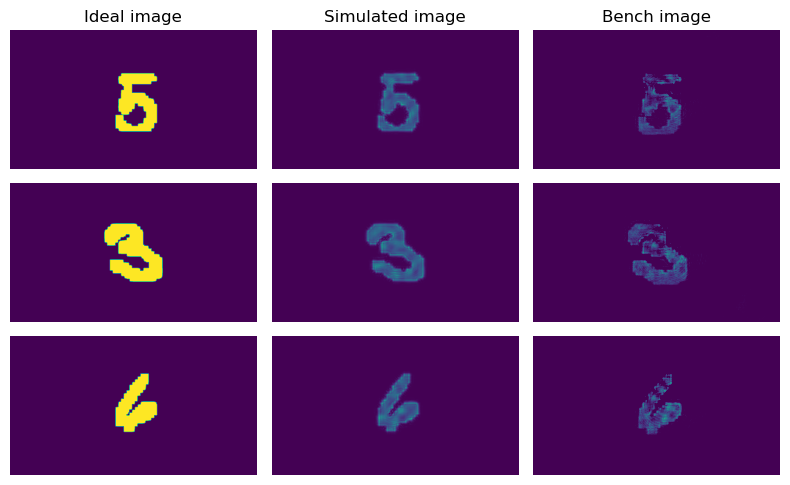

In [34]:
fig, ax = plt.subplots(3,3,figsize=(8,5))

for i in range(len(indices)):
    ax[i][0].imshow(ideal_images[i], cmap='viridis', vmin=0, vmax=1)
    ax[i][1].imshow(simulation_images[i], cmap='viridis', vmin=0, vmax=1)
    ax[i][2].imshow(bench_images[i], cmap='viridis', vmin=0, vmax=1)

ax[0][0].set_title("Ideal image")
ax[0][1].set_title("Simulated image")
ax[0][2].set_title("Bench image")

for a in ax.flatten():
    a.grid(False)
    a.axis(False)
plt.tight_layout()
fig.savefig(os.path.join(path_results, 'image_examples.pdf'))

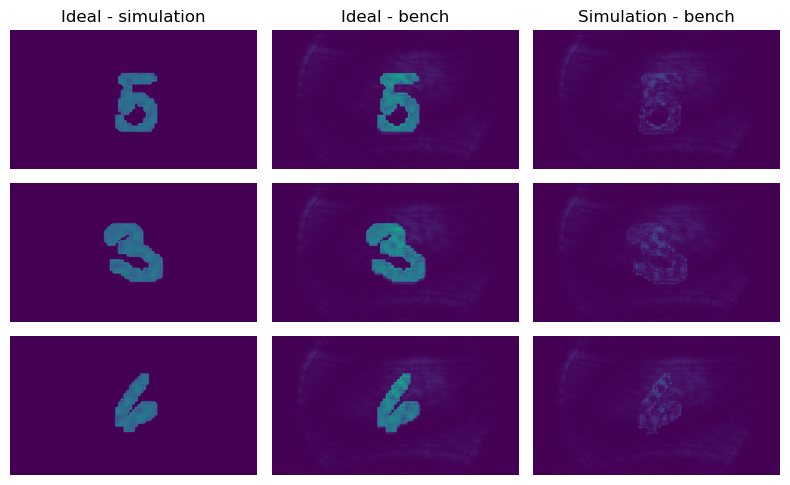

In [35]:
fig, ax = plt.subplots(3,3,figsize=(8,5))

for i in range(len(indices)):
    ax[i][0].imshow(np.abs(ideal_images[i] - simulation_images[i]), cmap='viridis', vmin=0, vmax=2)
    ax[i][1].imshow(np.abs(ideal_images[i] - bench_images[i]), cmap='viridis', vmin=0, vmax=2)
    ax[i][2].imshow(np.abs(simulation_images[i] - bench_images[i]), cmap='viridis', vmin=0, vmax=2)

ax[0][0].set_title("Ideal - simulation")
ax[0][1].set_title("Ideal - bench")
ax[0][2].set_title("Simulation - bench")

for a in ax.flatten():
    a.grid(False)
    a.axis(False)
plt.tight_layout()
fig.savefig(os.path.join(path_results, 'image_difference.pdf'))

In [36]:
np.abs(np.asarray(ideal_images) - np.asarray(bench_images)).max()

np.float64(1.3910064697265625)